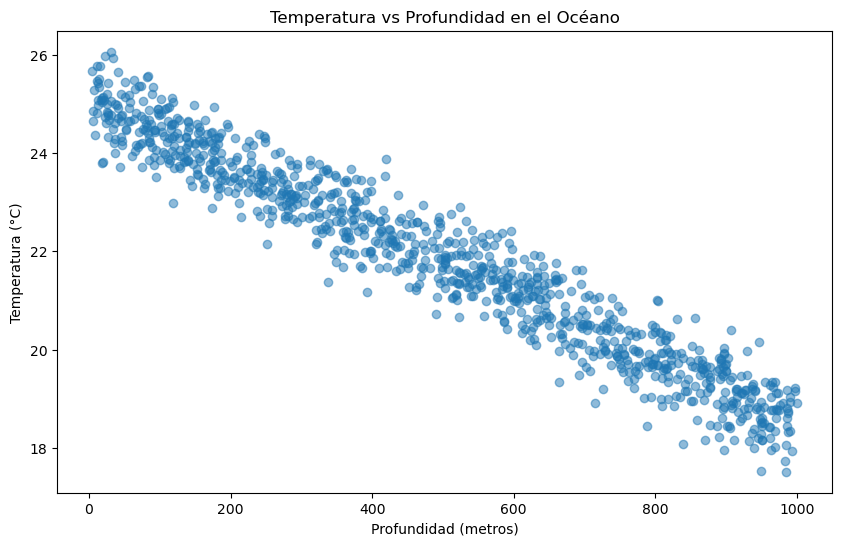

Error cuadrático medio: 0.2143
Coeficiente de determinación (R²): 0.9432


InvalidIndexError: (slice(None, None, None), None)

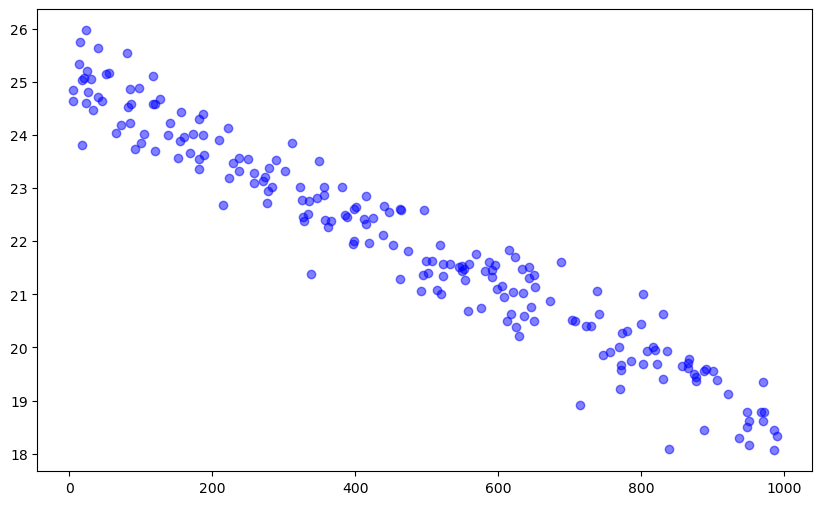

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Generar datos
np.random.seed(42)
n_samples = 1000

# Profundidad en metros (0 a 1000 metros)
depth = np.random.uniform(0, 1000, n_samples)

# Temperatura en grados Celsius
# Asumimos una relación lineal con algo de ruido
# Temperatura superficial media: 25°C
# Tasa de disminución: aproximadamente 0.65°C cada 100 metros
temperature = 25 - 0.0065 * depth + np.random.normal(0, 0.5, n_samples)

# Crear DataFrame
df = pd.DataFrame({'depth': depth, 'temperature': temperature})

# Visualizar datos
plt.figure(figsize=(10, 6))
plt.scatter(df['depth'], df['temperature'], alpha=0.5)
plt.title('Temperatura vs Profundidad en el Océano')
plt.xlabel('Profundidad (metros)')
plt.ylabel('Temperatura (°C)')
plt.show()

# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df[['depth']], df['temperature'], test_size=0.2, random_state=42)

# Crear y entrenar el modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error cuadrático medio: {mse:.4f}")
print(f"Coeficiente de determinación (R²): {r2:.4f}")

# Visualizar resultados
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', alpha=0.5, label='Datos reales')
plt.plot(X_test, y_pred, color='red', label='Predicciones')
plt.title('Temperatura vs Profundidad: Datos Reales y Predicciones')
plt.xlabel('Profundidad (metros)')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.show()

# Imprimir coeficientes del modelo
print(f"Pendiente: {model.coef_[0]:.6f}")
print(f"Intercepto: {model.intercept_:.2f}")

# Realizar validación cruzada
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, df[['depth']], df['temperature'], cv=5, scoring='r2')
print("\nPuntuaciones de validación cruzada:")
print(cv_scores)
print(f"Media de puntuaciones R²: {cv_scores.mean():.4f}")
print(f"Desviación estándar de puntuaciones R²: {cv_scores.std():.4f}")